## **ASSIGNMENT - ANOMALY DETECTION :**

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
- Finding data points that differ from normal behavior.
- Point: Single unusual value (e.g., high transaction).
- Contextual: Abnormal in context (e.g., high usage at night).
- Collective: Group anomaly (e.g., traffic spike).
---
Question 2:  Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
- Isolation Forest: Fast, good for large datasets.
- DBSCAN: Density-based, detects spatial outliers.
- LOF: Compares local density, good for relative anomalies.
---
Question 3: What are the key components of a Time Series? Explain each with one
example.
- Trend: Long-term direction.
- Seasonality: Repeating pattern.
- Cyclic: Irregular long cycles.
- Noise: Random variation.
---
Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- Series with constant mean and variance.
- Test: ADF test.
- Make stationary: Differencing, log transform.
---
Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
- AR: Past values.
- MA: Past errors.
- ARIMA: AR + MA + differencing.
- SARIMA: Seasonal ARIMA.
- SARIMAX: Seasonal ARIMA with external variables.
---

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

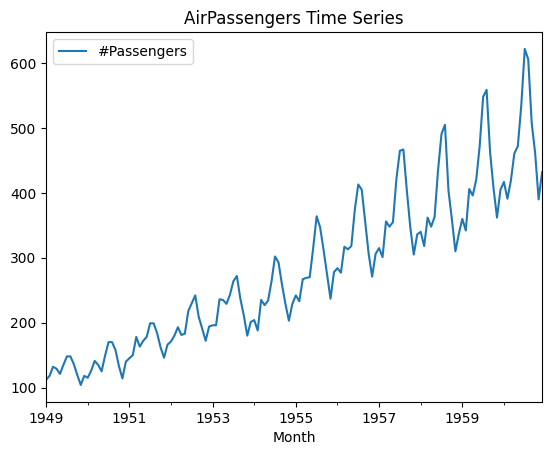

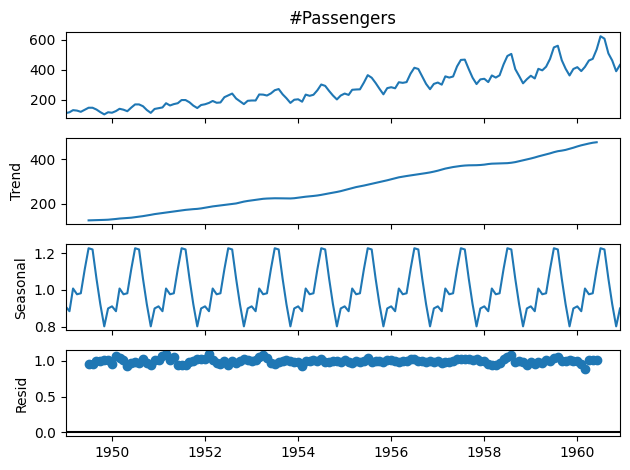

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('AirPassengers.csv', parse_dates=["Month"], index_col="Month")

data.plot(title="AirPassengers Time Series")
plt.show()

decomp = seasonal_decompose(data["#Passengers"], model="multiplicative")

decomp.plot()
plt.show()


Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

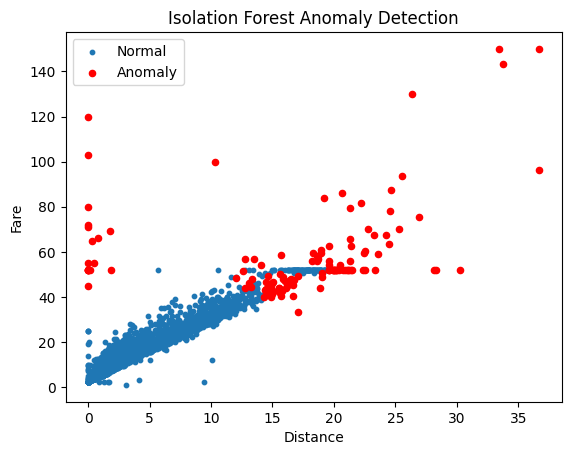

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv")

X = df[["distance", "fare"]].dropna()

iso = IsolationForest(contamination=0.02, random_state=42)
labels = iso.fit_predict(X)

normal = X[labels == 1]
anomaly = X[labels == -1]

plt.scatter(normal["distance"], normal["fare"], s=10, label="Normal")
plt.scatter(anomaly["distance"], anomaly["fare"], c="red", s=20, label="Anomaly")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.legend()
plt.title("Isolation Forest Anomaly Detection")
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


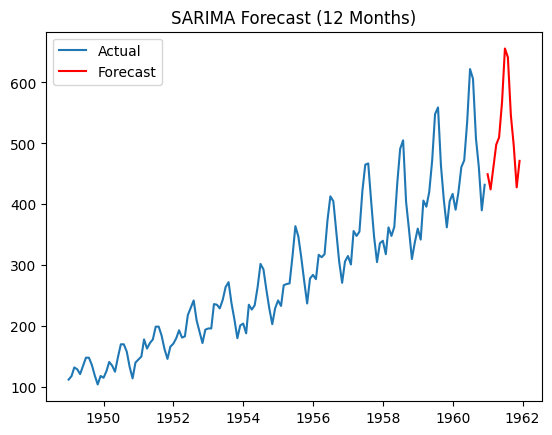

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv('AirPassengers.csv', parse_dates=["Month"], index_col="Month")
y = data["#Passengers"]

model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit(disp=False)

forecast = fit.forecast(12)

plt.plot(y, label="Actual")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.title("SARIMA Forecast (12 Months)")
plt.show()


Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

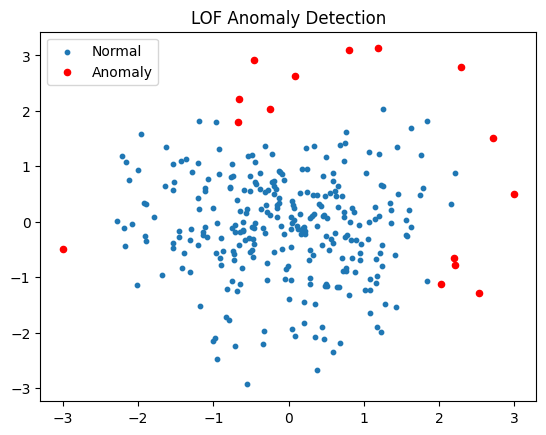

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

X = np.random.randn(300, 2)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

normal = X[labels == 1]
anomaly = X[labels == -1]

plt.scatter(normal[:,0], normal[:,1], s=10, label="Normal")
plt.scatter(anomaly[:,0], anomaly[:,1], c="red", s=20, label="Anomaly")
plt.legend()
plt.title("LOF Anomaly Detection")
plt.show()


Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
- ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
- ● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
- ● How would you validate and monitor the performance over time?
- ● How would this solution help business decisions or operations?

#####ANSWER:
- Anomaly Detection: Use Isolation Forest for real-time streams due to speed and scalability; LOF can be used for local pattern detection, DBSCAN less suitable for streaming.
- Forecasting Model: Use SARIMAX to capture seasonality (daily/weekly) and include external factors like weather and region.
- Validation & Monitoring: Continuously track forecast error (MAE/RMSE), anomaly rate, and retrain models periodically using rolling windows.
- Business Impact: Enables early detection of faults, prevents outages, optimizes energy distribution, and supports demand planning and cost reduction.